In [1]:
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers
from keras.callbacks import LearningRateScheduler
import numpy as np
import pickle 
 
def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 75:
        lrate = 0.0005
    if epoch > 100:
        lrate = 0.0003
    if epoch >125:
        lrate =0.0001
    return lrate
 
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
 
#z-score
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)
 
num_classes = 10
y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)
 
weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:]))
model.add(Activation('selu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('selu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('selu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('selu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('selu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('selu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('selu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('selu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))
 
model.summary()
 
#data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(x_train)
 
#training
batch_size = 64
 
opt_rms = keras.optimizers.rmsprop(lr=0.001,decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])
hist=model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),\
                    steps_per_epoch=x_train.shape[0] // batch_size,epochs=200,\
                    verbose=1,validation_data=(x_test,y_test),callbacks=[LearningRateScheduler(lr_schedule)])

#save to disk
model_json = model.to_json()
with open('model3.json', 'w') as json_file:
    json_file.write(model_json)
model.save_weights('model3.h5') 
 
#testing
scores = model.evaluate(x_test, y_test, batch_size=128, verbose=2)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))

res={"history" : hist.history, "scores" : scores}
pickle_out = open("8_layer_selu_200epoch.pickle","wb")
pickle.dump(res, pickle_out)
pickle_out.close()


Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_2

In [7]:
import pickle
pickle_in = open("8_layer_selu_200epoch.pickle","rb")
res = pickle.load(pickle_in)
res["history"]["val_acc"]

[0.521,
 0.6058,
 0.6529,
 0.6535,
 0.7083,
 0.7286,
 0.7554,
 0.7475,
 0.7305,
 0.7366,
 0.7937,
 0.7786,
 0.8014,
 0.7739,
 0.8164,
 0.802,
 0.8157,
 0.7904,
 0.8037,
 0.8325,
 0.825,
 0.8427,
 0.8136,
 0.8133,
 0.8278,
 0.8298,
 0.8295,
 0.8494,
 0.843,
 0.8239,
 0.8349,
 0.8453,
 0.8332,
 0.8449,
 0.8247,
 0.8336,
 0.8388,
 0.8545,
 0.8596,
 0.8254,
 0.8511,
 0.8488,
 0.8506,
 0.8325,
 0.8555,
 0.8483,
 0.8282,
 0.853,
 0.8478,
 0.8513,
 0.8647,
 0.856,
 0.8678,
 0.8409,
 0.8346,
 0.8518,
 0.8573,
 0.8471,
 0.864,
 0.8545,
 0.8508,
 0.8574,
 0.8557,
 0.8395,
 0.8564,
 0.8505,
 0.872,
 0.8298,
 0.8522,
 0.8623,
 0.8456,
 0.849,
 0.8561,
 0.8626,
 0.8723,
 0.8632,
 0.8705,
 0.874,
 0.8817,
 0.8823,
 0.88,
 0.8828,
 0.884,
 0.889,
 0.8817,
 0.8774,
 0.8906,
 0.8791,
 0.8842,
 0.8762,
 0.8878,
 0.8811,
 0.8868,
 0.8848,
 0.8629,
 0.875,
 0.8896,
 0.8856,
 0.8826,
 0.882,
 0.885,
 0.8791,
 0.8838,
 0.8923,
 0.8861,
 0.8887,
 0.8835,
 0.8924,
 0.8889,
 0.8953,
 0.8922,
 0.8891,
 0.8807,


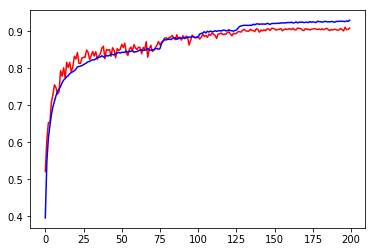

In [6]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline
x=np.arange(200)
pyplot.plot(x,res["history"]['val_acc'], 'r', x, res["history"]['acc'], 'b')
